### Introduction


My project would review Museum of Modern Art(MoMa) artwork collections data. Two data sets have been pulled directly from this website:https://www.kaggle.com/momanyc/museum-collection. The first data set contains basic information for each artwork, includes title, artist, department, etc. The second data set contains artist information, includes artist name, nationality, gender, etc.
I would like to group the artwork collection data by department, by acquisition date and by the related artist gender & artist nationality. 

### Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import

In [3]:
#import artwork collection data
artworks= pd.read_csv('artworks.csv')

In [4]:
#import artist data
artists= pd.read_csv('artists.csv')

In [5]:
artworks.head(2)

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN


In [6]:
artists.head(2)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,1,Robert Arneson,American,Male,1930.0,1992.0
1,2,Doroteo Arnaiz,Spanish,Male,1936.0,NaN


In [8]:
artworks.info() #Artist ID -- object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130262 entries, 0 to 130261
Data columns (total 21 columns):
Artwork_ID            130262 non-null int64
Title                 130210 non-null object
Artist_ID             128802 non-null object
Name                  128802 non-null object
Date                  127950 non-null object
Medium                118343 non-null object
Dimensions            118799 non-null object
Acquisition_Date      124799 non-null object
Credit                127192 non-null object
Catalogue             130262 non-null object
Department            130262 non-null object
Classification        130262 non-null object
Object Number         130262 non-null object
Diameter (cm)         1399 non-null float64
Circumference (cm)    10 non-null float64
Height (cm)           111893 non-null float64
Length (cm)           736 non-null float64
Width (cm)            111003 non-null float64
Depth (cm)            11443 non-null float64
Weight (kg)           298 non-null floa

In [10]:
artists.info() #Artist ID -- int data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15091 entries, 0 to 15090
Data columns (total 6 columns):
Artist ID      15091 non-null int64
Name           15091 non-null object
Nationality    12603 non-null object
Gender         12019 non-null object
Birth Year     11237 non-null float64
Death Year     4579 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 707.5+ KB


### Data Cleaning

artworks dateframe data cleaning

In [7]:
#rename some columns before merge two data sets
artworks.rename(columns={'Artwork ID': 'Artwork_ID', 'Artist ID': 'Artist_ID', 'Acquisition Date': 'Acquisition_Date'}, inplace=True)

In [8]:
#change the data type before merge two data sets
artworks['Artwork_ID'] = pd.to_numeric(artworks['Artwork_ID'], errors='coerce')
artworks['Artist_ID'] = pd.to_numeric(artworks['Artist_ID'], errors='coerce')
artworks['Acquisition_Date'] = pd.to_datetime(artworks['Acquisition_Date'], errors='coerce')

In [9]:
#clean the date column
artworks.Date.unique()

array(['1896', '1987', '1903', ..., 'September 8, 1962', '1954–1956',
       '1955–1967'], dtype=object)

In [10]:
# clean_date function: extra last 4 characters of a string
def clean_date(x):
    return x[-4:]

In [11]:
#check if clean_date func works or not
clean_date('cleandate')

'date'

In [12]:
#add clean_date column, and covert all date to string data type
artworks['Clean_Date'] = artworks['Date'].astype(str)

In [13]:
#apply clean_date func to extra last 4 characters of date
artworks['Clean_Date']= artworks['Clean_Date'].apply(clean_date)

artist dateframe data cleaning

In [14]:
#rename some columns before merge two data sets
artists.rename(columns={'Artist ID': 'Artist_ID', 'Birth Year': 'Birth_Year', 'Death Year': 'Death_Year'}, inplace=True)

In [15]:
#change the data type before merge two data sets
artists['Birth_Year'] = pd.to_datetime(artists['Birth_Year'], errors='coerce')
artists['Death_Year'] = pd.to_datetime(artists['Death_Year'], errors='coerce')

In [18]:
#clean Gender column
artists.Gender.unique()

array(['Male', 'Female', 'Unknown Gender', 'male'], dtype=object)

In [19]:
#fillna as 'Unknown Gender'
artists["Gender"].fillna("Unknown Gender", inplace = True)

In [20]:
#captalize the first character
artists['Gender'] = artists['Gender'].apply(lambda x: x.capitalize())

In [21]:
artists.Gender.unique()

array(['Male', 'Female', 'Unknown gender'], dtype=object)

### Merge Datasets

In [23]:
# merge artwork dataframe and artist dataframe based on Artist_ID
df = pd.merge(artworks, artists, on = 'Artist_ID', how = 'left')

In [24]:
df.head(2)

,Artwork_ID,Title,Artist_ID,Name_x,Date,Medium,Dimensions,Acquisition_Date,Credit,Catalogue,...,Width (cm),Depth (cm),Weight (kg),Duration (s),Clean_Date,Name_y,Nationality,Gender,Birth_Year,Death_Year
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210.0,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,168.9000,NaN,NaN,NaN,1896,Otto Wagner,Austrian,Male,1970-01-01 00:00:00.000001841,1970-01-01 00:00:00.000001918
1,3,"City of Music, National Superior Conservatory ...",7470.0,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,29.8451,NaN,NaN,NaN,1987,Christian de Portzamparc,French,Male,1970-01-01 00:00:00.000001944,NaT


In [25]:
#drop dupliated name column & rename it as 'Name'
df = df.drop('Name_x', 1)
df.rename(columns={'Name_y': 'Name'}, inplace=True)

In [26]:
#check if df has dupliated artwork_id before count
pd.Series(df['Artwork_ID']).is_unique

True

In [38]:
df.head(2)

,Artwork_ID,Title,Artist_ID,Date,Medium,Dimensions,Acquisition_Date,Credit,Catalogue,Department,...,Width (cm),Depth (cm),Weight (kg),Duration (s),Clean_Date,Name,Nationality,Gender,Birth_Year,Death_Year
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210.0,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,Architecture & Design,...,168.9000,NaN,NaN,NaN,1896,Otto Wagner,Austrian,Male,1970-01-01 00:00:00.000001841,1970-01-01 00:00:00.000001918
1,3,"City of Music, National Superior Conservatory ...",7470.0,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,Architecture & Design,...,29.8451,NaN,NaN,NaN,1987,Christian de Portzamparc,French,Male,1970-01-01 00:00:00.000001944,NaT


### Data Exploration

Artwork collections data by Department

In [27]:
df_d = df.groupby('Department')['Artwork_ID'].count().sort_values(ascending=False).to_frame('Number_of_Artwork').reset_index()

In [28]:
df_d # 9 depts; Prints & Illustrated Books Dept has the highest number of collections

,Department,Number_of_Artwork
0,Prints & Illustrated Books,60128
1,Photography,29161
2,Architecture & Design,18269
3,Drawings,11027
4,Painting & Sculpture,3806
5,Film,3088
6,Media and Performance Art,2627
7,Fluxus Collection,2135
8,Architecture & Design - Image Archive,21


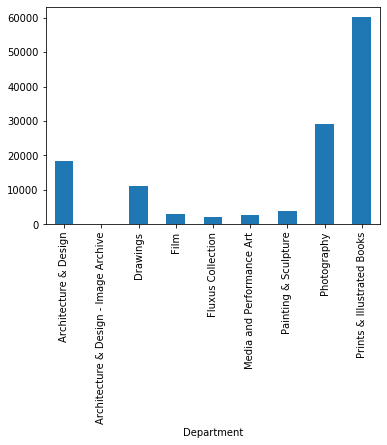

In [29]:
df.groupby('Department')['Artwork_ID'].count().plot(kind='bar')

In [30]:
df.Department.value_counts(normalize = True) #Prints & Illustrated Books Dept contributed 46% of the artwork collections in MoMA

Prints & Illustrated Books               0.461593
Photography                              0.223864
Architecture & Design                    0.140248
Drawings                                 0.084652
Painting & Sculpture                     0.029218
Film                                     0.023706
Media and Performance Art                0.020167
Fluxus Collection                        0.016390
Architecture & Design - Image Archive    0.000161
Name: Department, dtype: float64

Artwork collections data by Artist Nationality

In [31]:
df_n = df.groupby('Nationality')['Artwork_ID'].count().sort_values(ascending=False).to_frame('Number_of_Artwork').reset_index()

In [32]:
df_n.shape #artists come from 121 countries

(121, 2)

In [33]:
#filter out the ones with more than 1000 collections
nation_chart = df_n[df_n.Number_of_Artwork >= 1000]

In [34]:
nation_chart.shape #12 countries have more than 1000 artwork collections been acquired

(12, 2)

Text(0.5, 1.0, 'Artwork Collections by Artist Nationality')

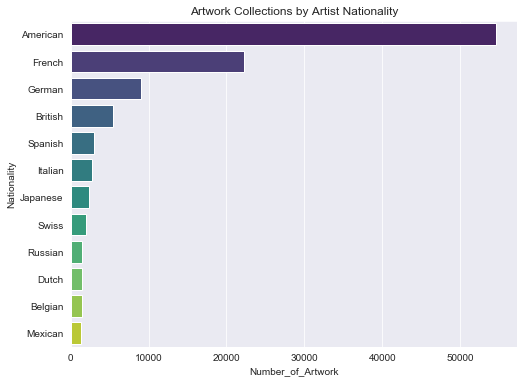

In [36]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_style("darkgrid")
sns.barplot(x='Number_of_Artwork', y='Nationality', data=nation_chart, palette='viridis')
plt.title("Artwork Collections by Artist Nationality")

In [37]:
#nationality distribution by dept
department = ['Prints & Illustrated Books', 'Photography', 'Architecture & Design', 'Drawings', 'Painting & Sculpture', 'Film', 'Media and Performance Art', 'Fluxus Collection', 'Architecture & Design - Image Archive']
for d in department: 
    print(d)
    df_d_data = df[(df.Department == d)].Nationality.value_counts(normalize = True)
    print(df_d_data.head(5))

#American artist collections contributed 39.7% in Print & Illustrated Books dept
#American artist collections contributed 54.3% in Photography dept

Prints & Illustrated Books
American    0.397012
French      0.246688
German      0.067646
British     0.045392
Spanish     0.042566
Name: Nationality, dtype: float64
Photography
American    0.543423
French      0.238695
German      0.062285
British     0.060219
Dutch       0.018785
Name: Nationality, dtype: float64
Architecture & Design
American    0.431613
German      0.122855
Swiss       0.044235
Italian     0.043028
British     0.041502
Name: Nationality, dtype: float64
Drawings
American    0.518693
German      0.103111
French      0.070248
British     0.039417
Japanese    0.026309
Name: Nationality, dtype: float64
Painting & Sculpture
American    0.520211
French      0.116513
German      0.071863
British     0.044650
Spanish     0.037252
Name: Nationality, dtype: float64
Film
American    0.669865
French      0.049280
British     0.022678
Canadian    0.021805
Spanish     0.021369
Name: Nationality, dtype: float64
Media and Performance Art
American    0.427790
Swiss       0.099772
Be

Artwork collections data by Artist Gender

In [40]:
df_g = df.groupby('Gender')['Artwork_ID'].count().sort_values(ascending=False).to_frame('Number_of_Artwork').reset_index()

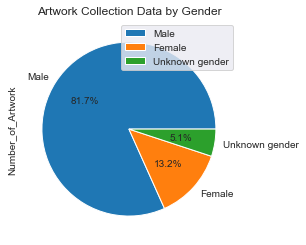

In [41]:
labels = df_g['Gender']
plot = df_g.plot.pie(y='Number_of_Artwork', title="Artwork Collection Data by Gender", legend=True, labels=labels, autopct='%1.1f%%')

Artwork collections data by Acquisition Year

In [42]:
#extra year to get acquisition year
df['Acquisition_Year'] = df['Acquisition_Date'].dt.year

In [43]:
df_y = df.groupby('Acquisition_Year')['Artwork_ID'].count().sort_values(ascending=False).to_frame('Number_of_Artwork').reset_index()

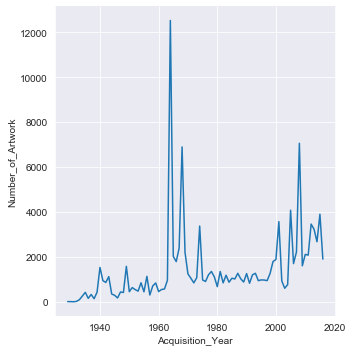

In [44]:
sns.set_style("darkgrid")
sns.relplot(x="Acquisition_Year", y="Number_of_Artwork", kind="line", data=df_y)

In [45]:
df_y.head(10) #two peaks - Y1964 and Y2008

,Acquisition_Year,Number_of_Artwork
0,1964.0,12531
1,2008.0,7062
2,1968.0,6897
3,2005.0,4079
4,2015.0,3902
5,2001.0,3571
6,2012.0,3462
7,1974.0,3374
8,2013.0,3231
9,2014.0,2675


In [57]:
df['Acquisition_Year'].describe() #earliest acquisition happened in Y1929, while latest happened in Y2016.

count    124798.000000
mean       1983.530722
std          22.488423
min        1929.000000
25%        1965.000000
50%        1983.000000
75%        2006.000000
max        2016.000000
Name: Acquisition_Year, dtype: float64

Artwork collections data by Artist

In [46]:
#drop null value in artist column
df_1 = df.dropna(subset=['Name'])

In [47]:
#drop Unknow value
df_2 = df_1.drop(df_1.index[df_1.Name == 'Unknown photographer'])
df_3 = df_2.drop(df_2.index[df_2.Name == 'Unknown Artist'])

In [48]:
df_a = df_3.groupby('Name')['Artwork_ID'].count().sort_values(ascending=False).to_frame('Number_of_Artwork').reset_index()

Text(0.5, 1.0, 'Top 20 Artists')

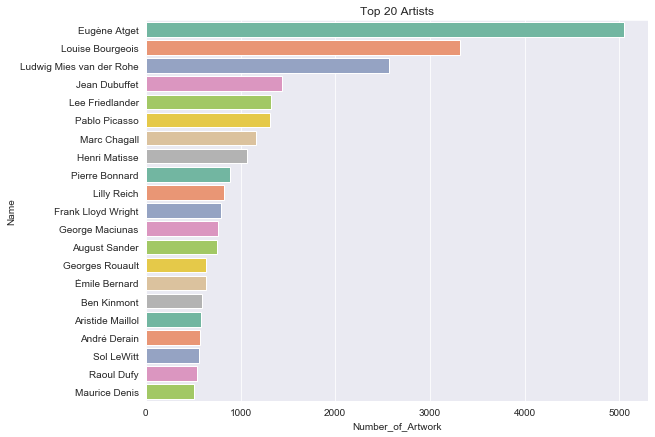

In [50]:
fig_dims = (9, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_style("darkgrid")
sns.barplot(x='Number_of_Artwork', y='Name', data=df_a[:21], palette='Set2')
plt.title("Top 20 Artists") #artists have the highest number of artworks

In [51]:
#find the Painting & Sculpture dept
df_painting = df_3[df_3.Department == 'Painting & Sculpture']

In [52]:
df_a1 = df_painting.groupby('Name')['Artwork_ID'].count().sort_values(ascending=False).to_frame('Number_of_Artwork').reset_index()

Text(0.5, 1.0, 'Top 20 Artists in Painting & Sculpture Dept')

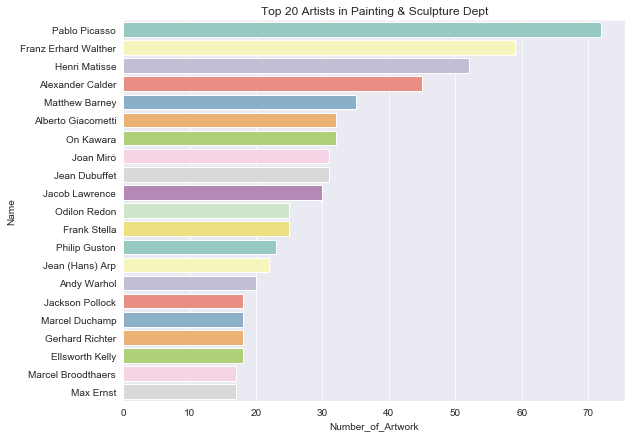

In [53]:
fig_dims = (9, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_style("darkgrid")
sns.barplot(x='Number_of_Artwork', y='Name', data=df_a1[:21], palette='Set3')
plt.title("Top 20 Artists in Painting & Sculpture Dept")

In [54]:
sub = str(input("pls input the artist name: "))
df_test = df[(df.Name == sub)]
print(f"The artist name is {sub}. The related data is as below ")
df_test

pls input the artist name: Pablo Picasso
The artist name is Pablo Picasso. The related data is as below 


,Artwork_ID,Title,Artist_ID,Date,Medium,Dimensions,Acquisition_Date,Credit,Catalogue,Department,...,Depth (cm),Weight (kg),Duration (s),Clean_Date,Name,Nationality,Gender,Birth_Year,Death_Year,Acquisition_Year
3884,4891,"Picasso, ""Les Menines,"" Galerie Louise Leiris",4609.0,1959,Lithograph,"18 3/4 x 26 1/4"" (47.6 x 66.6 cm)",1960-04-06,Gift of Mourlot Frères,Y,Architecture & Design,...,NaN,NaN,NaN,1959,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,1960.0
4440,5481,Vallauris 1951 Exposition,4609.0,1951,Linocut,"25 5/8 x 19 1/2"" (65.1 x 49.5 cm)",1968-03-07,Given anonymously,Y,Architecture & Design,...,NaN,NaN,NaN,1951,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,1968.0
5244,6305,Exposition Hispano-Americaine,4609.0,1951,Lithograph,"23 1/4 x 18"" (59.1 x 45.7 cm)",1953-04-07,Purchase,Y,Architecture & Design,...,NaN,NaN,NaN,1951,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,1953.0
5247,6308,Picasso et le théâtre,4609.0,1965,Lithograph,"35 3/4 x 22 3/4"" (90.8 x 57.8 cm)",1966-05-10,Gift of James Thrall Soby,Y,Architecture & Design,...,NaN,NaN,NaN,1965,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,1966.0
5251,6312,Exposition Vallauris,4609.0,1952,Linoleum cut,"each: 26 1/8 x 19 3/4"" (66.4 x 50.2 cm)",1953-04-07,Gift of Curt Valentin,N,Architecture & Design,...,NaN,NaN,NaN,1952,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,1953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113717,165083,"Célestine, maja et complice masculin (plate, p...",4609.0,"1968, published 1971",One from an illustrated book with 66 etching a...,"page (each, approx.): 8 1/4 x 6 7/16"" (21 x 16...",2012-10-03,Committee on Prints and Illustrated Books Fund,N,Prints & Illustrated Books,...,NaN,NaN,NaN,1971,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,2012.0
113718,165084,"Couple, hibou et odalisque à cheval (Le Départ...",4609.0,"1968, published 1971",One from an illustrated book with 66 etching a...,"page (each, approx.): 8 1/4 x 6 7/16"" (21 x 16...",2012-10-03,Committee on Prints and Illustrated Books Fund,N,Prints & Illustrated Books,...,NaN,NaN,NaN,1971,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,2012.0
113719,165085,La Célestine présentant ses deux pensionnaires...,4609.0,"1968, published 1971",One from an illustrated book with 66 etching a...,"page (each, approx.): 8 1/4 x 6 7/16"" (21 x 16...",2012-10-03,Committee on Prints and Illustrated Books Fund,N,Prints & Illustrated Books,...,NaN,NaN,NaN,1971,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,2012.0
122569,188137,Seated Woman,4609.0,"Vallauris, 1947",Glazed earthenware,"7 1/2 x 1 15/16 x 2 3/4"" (19 x 5 x 7 cm)",2016-06-06,Gift of Almine and Bernard Ruiz-Picasso,Y,Painting & Sculpture,...,7.0,NaN,NaN,1947,Pablo Picasso,Spanish,Male,1970-01-01 00:00:00.000001881,1970-01-01 00:00:00.000001973,2016.0
